
# Project Part 3:
In this part of the project we have implemented a CNN with the given architecture.

importing the required packages.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as ks
import scipy.io as sc
import pandas as pd
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

importing the training and test data from mat file

In [3]:
trX = sc.loadmat('train_32x32.mat')['X']
trY = sc.loadmat('train_32x32.mat')['y']
tsX = sc.loadmat('test_32x32.mat')['X']
tsY = sc.loadmat('test_32x32.mat')['y']

Re shaping the train data and converting it to float type

In [4]:
trX = trX.reshape(trX.shape[0], 32, 32, 3)
trX = trX.astype('float32')
trX/= 255 # converting the rgb values


Re shaping test data and converting it to float type

In [5]:
tsX = tsX.reshape(tsX.shape[0], 32, 32, 3)
tsX = tsX.astype('float32')
tsX/= 255

Normalizing the labels and encoding them with one-hot vector encoding. 

In [6]:
trY_encoded=to_categorical(trY)

In [7]:
tsY_encoded=to_categorical(tsY)

In [8]:
trY_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [9]:
trX

array([[[[0.12941177, 0.11764706, 0.14901961],
         [0.05882353, 0.09019608, 0.07450981],
         [0.05882353, 0.06666667, 0.07450981],
         ...,
         [0.28235295, 0.25490198, 0.21960784],
         [0.32156864, 0.3019608 , 0.22352941],
         [0.34901962, 0.30980393, 0.23137255]],

        [[0.10980392, 0.15294118, 0.13725491],
         [0.05490196, 0.09803922, 0.08627451],
         [0.05490196, 0.07843138, 0.06666667],
         ...,
         [0.15686275, 0.15294118, 0.19607843],
         [0.2627451 , 0.22745098, 0.20392157],
         [0.3254902 , 0.30588236, 0.23529412]],

        [[0.15686275, 0.16078432, 0.14901961],
         [0.07058824, 0.08235294, 0.10196079],
         [0.0627451 , 0.06666667, 0.09019608],
         ...,
         [0.09019608, 0.11372549, 0.1764706 ],
         [0.13725491, 0.16470589, 0.17254902],
         [0.28235295, 0.27058825, 0.20784314]],

        ...,

        [[0.3372549 , 0.31764707, 0.29411766],
         [0.34117648, 0.32156864, 0.2784314 ]

Initializing parameters

In [22]:
class_count=10
batch_size=64
learning_rate=0.1

In [11]:
input_size=(32,32,3)

Building our Convolution neural network according to the provided architecture.

In [23]:
cnn_model= Sequential()
cnn_model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', strides=(1,1), padding='same',input_shape=input_size)) # first layer conv2D layer with the specifications provided
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), padding='same',input_shape=input_size )) # second layer MaxPool2D layer with the specifications provided
cnn_model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', strides=(1,1), padding='same', input_shape=input_size)) # third layer conv2D layer with the specifications provided
cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), padding='same', input_shape=input_size )) # fourth layer MaxPool2D layer with the specifications provided
cnn_model.add(Conv2D(128, kernel_size=(5, 5), activation='relu', strides=(1,1), padding='same', input_shape=input_size )) # fifth layer conv2D layer with the specifications provided
cnn_model.add(Flatten()) # flattening the result before sending to next layers
cnn_model.add(Dense(3072, activation='relu')) # FC layer with given specifications
cnn_model.add(Dense(2048, activation='relu')) 
cnn_model.add(Dense(class_count, activation='softmax')) # last layer with 10 classes and softmax activation


Initializing the optimizer and adding it to our CNN.

In [24]:
opt_sgd=SGD(learning_rate=learning_rate)
cnn_model.compile(optimizer=opt_sgd, loss=categorical_crossentropy, metrics='accuracy')

Training our model with the given training data and validating the model with test data.

In [25]:
model_accuracy=cnn_model.fit(trX,trY_encoded,epochs=20,batch_size=batch_size,validation_data=(tsX, tsY_encoded) )

Epoch 1/20
1145/1145 [==============================] - 15s 13ms/step - loss: 1.6482 - accuracy: 0.4211 - val_loss: 0.5073 - val_accuracy: 0.8442
Epoch 2/20
1145/1145 [==============================] - 15s 13ms/step - loss: 0.3657 - accuracy: 0.8901 - val_loss: 0.3645 - val_accuracy: 0.8941
Epoch 3/20
1145/1145 [==============================] - 15s 13ms/step - loss: 0.2500 - accuracy: 0.9255 - val_loss: 0.3255 - val_accuracy: 0.9065
Epoch 4/20
1145/1145 [==============================] - 15s 13ms/step - loss: 0.1791 - accuracy: 0.9477 - val_loss: 0.3370 - val_accuracy: 0.9086
Epoch 5/20
1145/1145 [==============================] - 14s 13ms/step - loss: 0.1142 - accuracy: 0.9671 - val_loss: 0.3531 - val_accuracy: 0.9092
Epoch 6/20
1145/1145 [==============================] - 14s 13ms/step - loss: 0.0746 - accuracy: 0.9786 - val_loss: 0.4078 - val_accuracy: 0.9081
Epoch 7/20
1145/1145 [==============================] - 15s 13ms/step - loss: 0.0475 - accuracy: 0.9863 - val_loss: 0.4426 -

Evaluating the accuracy of our model for test data

In [29]:
accuracy=cnn_model.evaluate(tsX, tsY_encoded)

814/814 [==============================] - 3s 4ms/step - loss: 0.6729 - accuracy: 0.9265


Plot of accuracy for training and test data as a function of epochs.

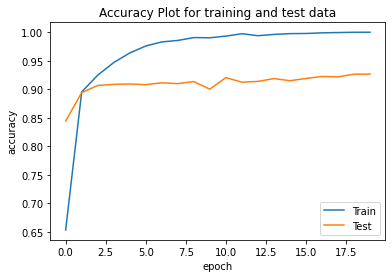

In [35]:
plt.plot(model_accuracy.history['accuracy'])
plt.plot(model_accuracy.history['val_accuracy'])
plt.title('Accuracy Plot for training and test data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='lower right')
plt.show()

Plot of Loss function value for both training and test data as a function of epochs. 

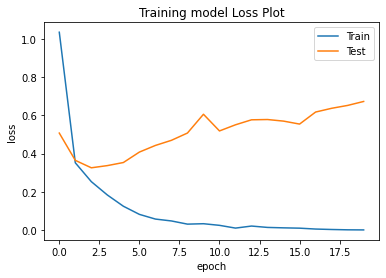

In [39]:
plt.plot(model_accuracy.history['loss'])
plt.plot(model_accuracy.history['val_loss'])
plt.title('Training model Loss Plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'],loc='upper right')
plt.show()